# Image Sampling and Quantization Lab

This lab demonstrates the effects of different sampling techniques and quantization levels on image quality.

## Import Libraries

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

## Load and Convert Image to Grayscale

## Interpolation Functions

In [4]:
def apply_sampling(image, scale_factor):
    h, w = image.shape
    small_img = cv2.resize(image, (w//scale_factor, h//scale_factor), interpolation=cv2.INTER_AREA)
    
    bilinear = cv2.resize(small_img, (w, h), interpolation=cv2.INTER_LINEAR)
    bicubic = cv2.resize(small_img, (w, h), interpolation=cv2.INTER_CUBIC)
    nearest = cv2.resize(small_img, (w, h), interpolation=cv2.INTER_NEAREST)
    lanczos = cv2.resize(small_img, (w, h), interpolation=cv2.INTER_LANCZOS4)
    
    return bilinear, bicubic, nearest, lanczos, small_img

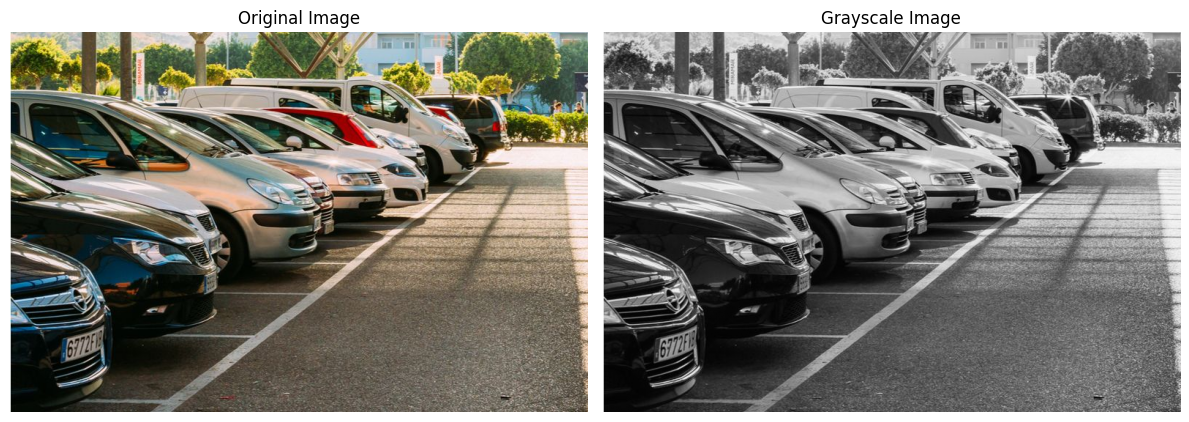

In [5]:
img = cv2.imread('parking.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.tight_layout()
plt.show()

## Apply Different Interpolation Techniques

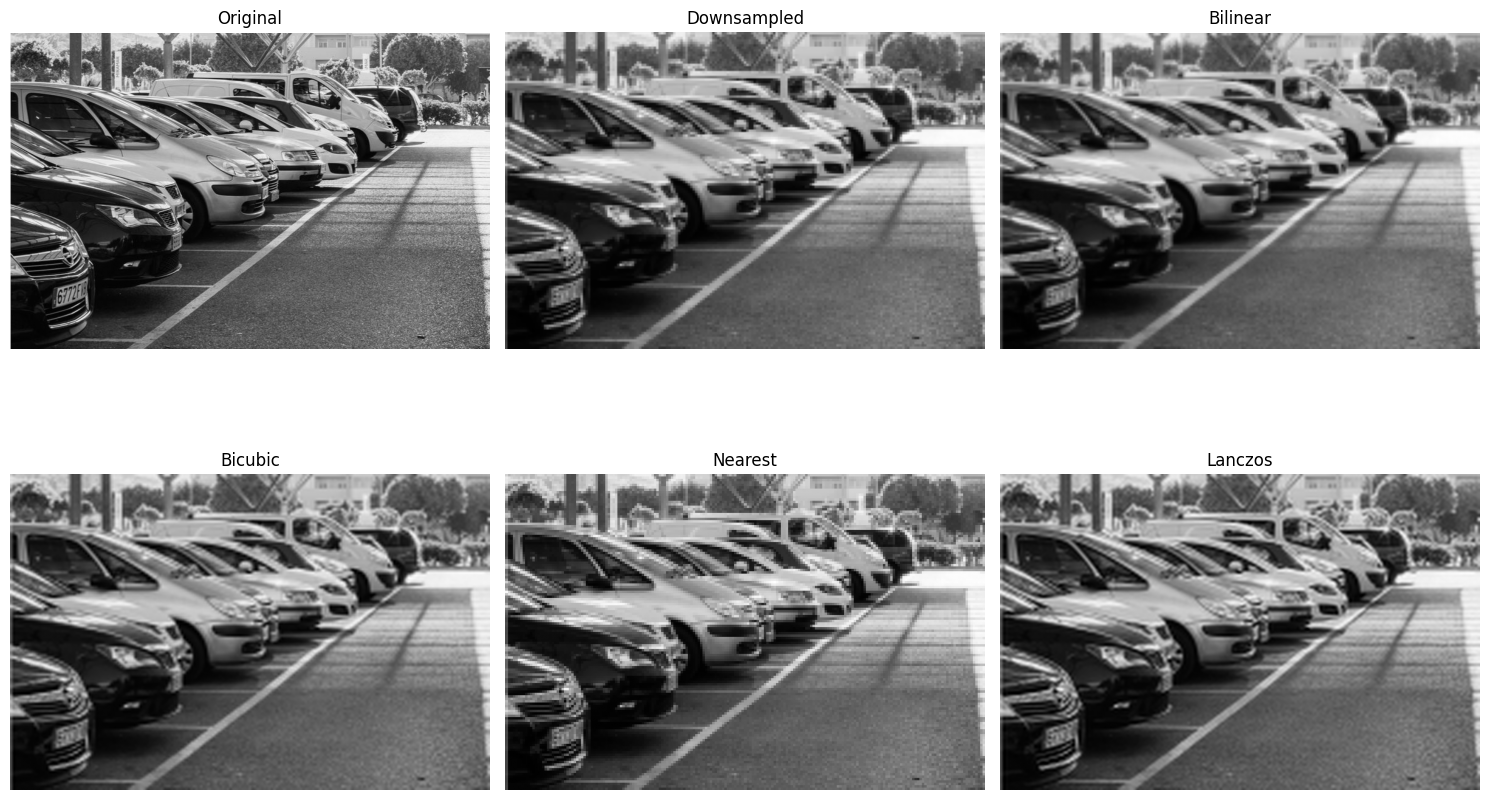

In [6]:
scale_factor = 4
bilinear, bicubic, nearest, lanczos, downsampled = apply_sampling(img_gray, scale_factor)

plt.figure(figsize=(15, 10))
images = [img_gray, downsampled, bilinear, bicubic, nearest, lanczos]
titles = ['Original', 'Downsampled', 'Bilinear', 'Bicubic', 'Nearest', 'Lanczos']

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Quantization Function

In [7]:
def quantize_image(image, bits):
    levels = 2 ** bits
    factor = 256 / levels
    quantized = np.floor(image / factor) * factor
    return np.clip(quantized, 0, 255).astype(np.uint8)

## Apply Different Quantization Levels

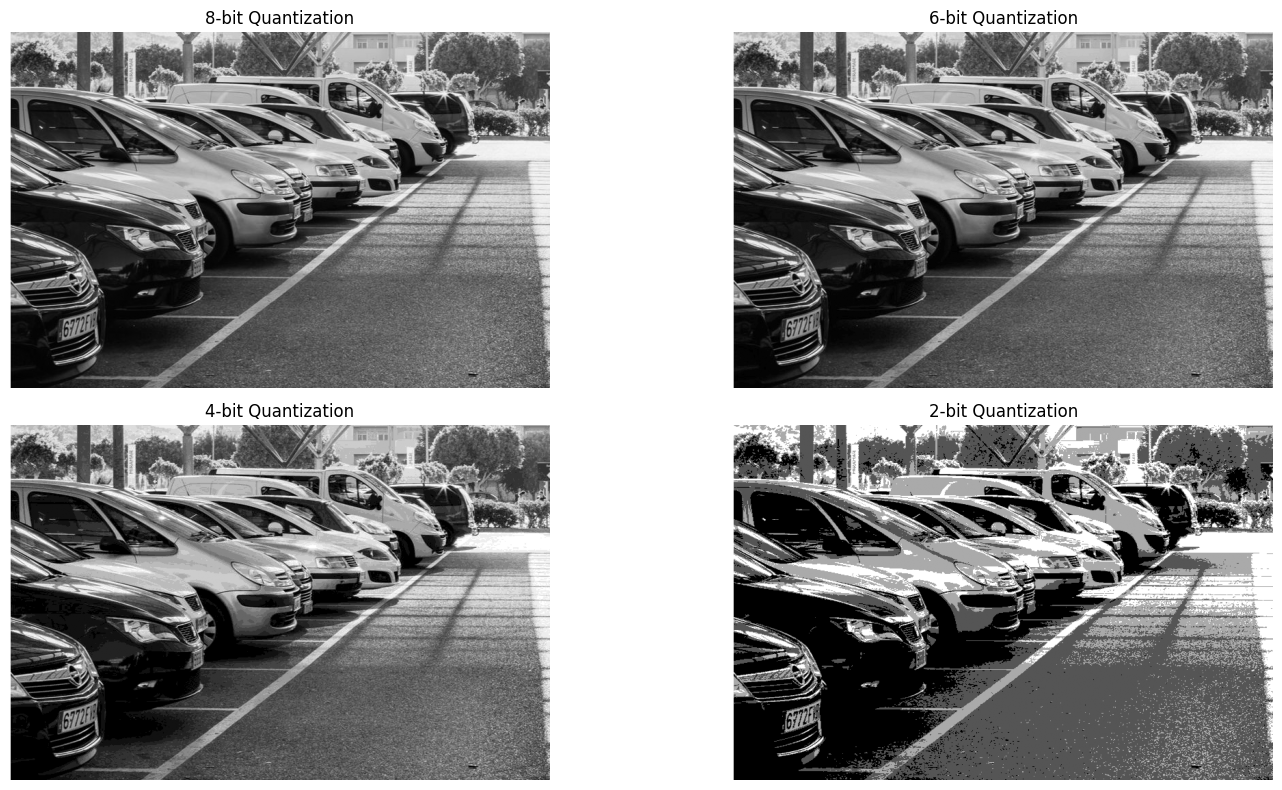

In [8]:
bit_levels = [8, 6, 4, 2]
quantized_images = []

for bits in bit_levels:
    quantized = quantize_image(img_gray, bits)
    quantized_images.append(quantized)

plt.figure(figsize=(16, 8))
for i, (img, bits) in enumerate(zip(quantized_images, bit_levels)):
    plt.subplot(2, 2, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'{bits}-bit Quantization')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Combined Effects: Sampling and Quantization

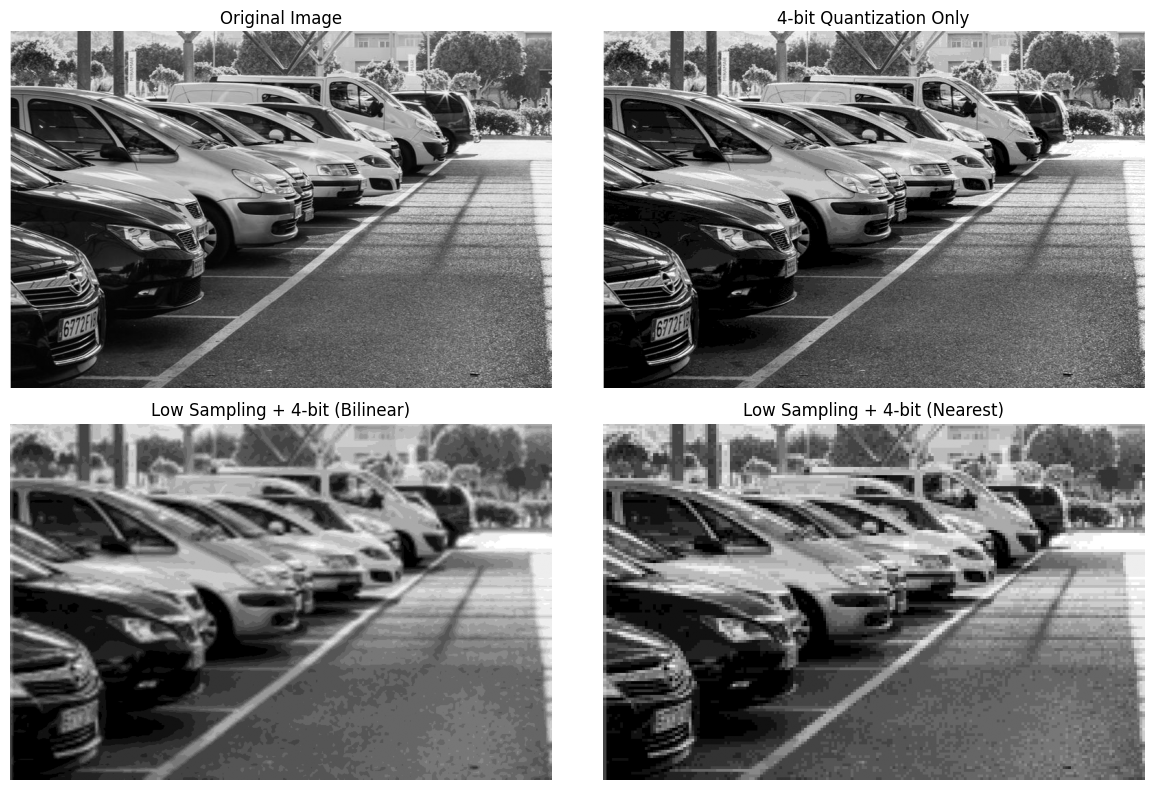

In [9]:
low_res_bilinear = quantize_image(bilinear, 4)
low_res_nearest = quantize_image(nearest, 4)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(quantize_image(img_gray, 4), cmap='gray')
plt.title('4-bit Quantization Only')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(low_res_bilinear, cmap='gray')
plt.title('Low Sampling + 4-bit (Bilinear)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(low_res_nearest, cmap='gray')
plt.title('Low Sampling + 4-bit (Nearest)')
plt.axis('off')

plt.tight_layout()
plt.show()

## Quality Metrics Analysis

In [10]:
def calculate_psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(mse))

print("PSNR Analysis:")
print(f"Bilinear interpolation: {calculate_psnr(img_gray, bilinear):.2f} dB")
print(f"Bicubic interpolation: {calculate_psnr(img_gray, bicubic):.2f} dB")
print(f"Nearest neighbor: {calculate_psnr(img_gray, nearest):.2f} dB")
print(f"Lanczos interpolation: {calculate_psnr(img_gray, lanczos):.2f} dB")

print("\nQuantization PSNR:")
for bits in bit_levels:
    quantized = quantize_image(img_gray, bits)
    psnr = calculate_psnr(img_gray, quantized)
    print(f"{bits}-bit quantization: {psnr:.2f} dB")

PSNR Analysis:
Bilinear interpolation: 29.83 dB
Bicubic interpolation: 29.97 dB
Nearest neighbor: 30.03 dB
Lanczos interpolation: 29.96 dB

Quantization PSNR:
8-bit quantization: inf dB
6-bit quantization: 42.69 dB
4-bit quantization: 29.28 dB
2-bit quantization: 27.91 dB


## Artifacts Analysis

In [11]:
print("Observed Artifacts:")
print("\n1. Sampling Artifacts:")
print("   - Nearest Neighbor: Blocky, pixelated appearance")
print("   - Bilinear: Slight blurring, loss of sharp edges") 
print("   - Bicubic: Better edge preservation, minimal artifacts")
print("   - Lanczos: Sharp edges, some ringing artifacts")

print("\n2. Quantization Artifacts:")
print("   - 8-bit: No visible artifacts")
print("   - 6-bit: Slight banding in smooth gradients")
print("   - 4-bit: Noticeable false contouring")
print("   - 2-bit: Severe posterization, loss of detail")

print("\n3. Quality Degradation Comparison:")
print("   - Low quantization typically degrades quality more than low sampling")
print("   - Quantization creates false contouring and banding")
print("   - Low sampling creates blur and aliasing but preserves tonal range")

print("\n4. Impact on Compression/Transmission:")
print("   - Lower quantization: Smaller file sizes, faster transmission")
print("   - Lower sampling: Dramatically smaller files, much faster transmission")
print("   - Trade-off between quality and efficiency depends on application")

Observed Artifacts:

1. Sampling Artifacts:
   - Nearest Neighbor: Blocky, pixelated appearance
   - Bilinear: Slight blurring, loss of sharp edges
   - Bicubic: Better edge preservation, minimal artifacts
   - Lanczos: Sharp edges, some ringing artifacts

2. Quantization Artifacts:
   - 8-bit: No visible artifacts
   - 6-bit: Slight banding in smooth gradients
   - 4-bit: Noticeable false contouring
   - 2-bit: Severe posterization, loss of detail

3. Quality Degradation Comparison:
   - Low quantization typically degrades quality more than low sampling
   - Quantization creates false contouring and banding
   - Low sampling creates blur and aliasing but preserves tonal range

4. Impact on Compression/Transmission:
   - Lower quantization: Smaller file sizes, faster transmission
   - Lower sampling: Dramatically smaller files, much faster transmission
   - Trade-off between quality and efficiency depends on application


## Edge Detection Comparison

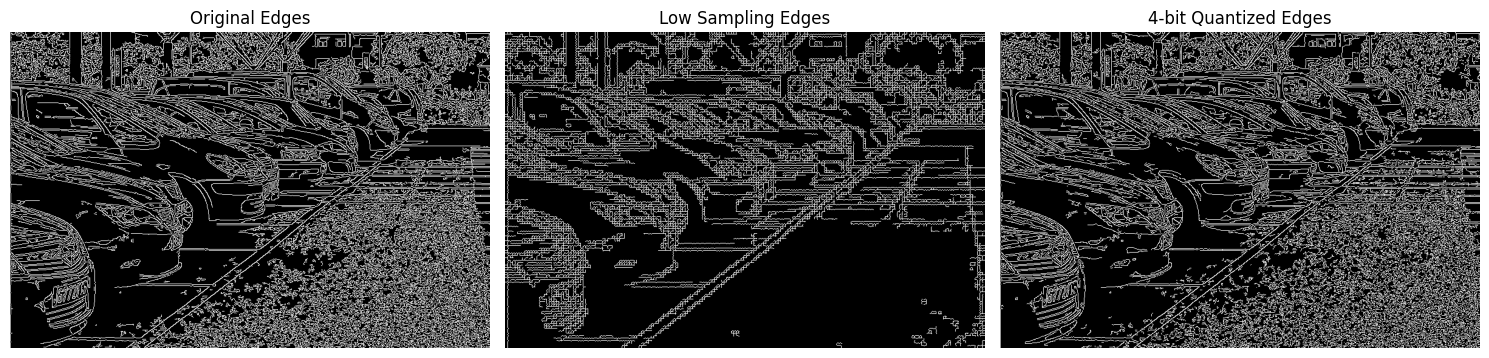

In [12]:
edges_original = cv2.Canny(img_gray, 50, 150)
edges_nearest = cv2.Canny(nearest, 50, 150)
edges_4bit = cv2.Canny(quantize_image(img_gray, 4), 50, 150)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(edges_original, cmap='gray')
plt.title('Original Edges')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges_nearest, cmap='gray')
plt.title('Low Sampling Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges_4bit, cmap='gray')
plt.title('4-bit Quantized Edges')
plt.axis('off')

plt.tight_layout()
plt.show()